# K-Nearest Neighbors

#### Problem Statement

The problem that we are going to solve here is that given a set of features that describe a tumour whether it is Malignant or Benign, our machine learning model must predict whether the tumour is Malignant or Benign. To train our machine learning model with tumour data, we will be using Small Cell Lung Cancer dataset 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
data.shape

(569, 32)

(array([ 17.,  96., 154., 145.,  89.,  40.,  21.,   4.,   2.,   1.]),
 array([ 9.71 , 12.667, 15.624, 18.581, 21.538, 24.495, 27.452, 30.409,
        33.366, 36.323, 39.28 ]),
 <a list of 10 Patch objects>)

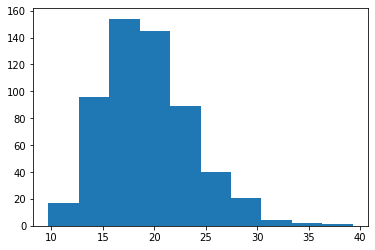

In [4]:
plt.hist(data['texture_mean'])

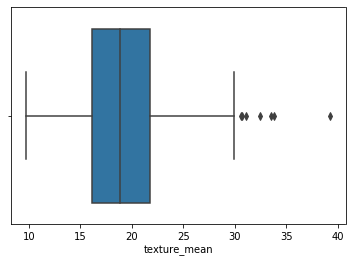

In [5]:
sns.boxplot(data['texture_mean'])

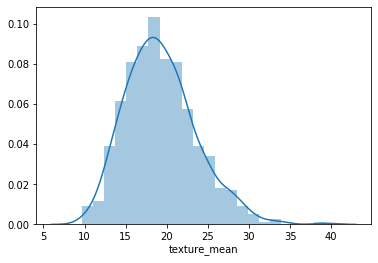

In [6]:
sns.distplot(data['texture_mean'])

In [7]:
# Check for frequency of B and M
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [9]:
# Split the dataset into input and output--> Train and test
# Train--> Building the model
# Test--> How well the model has learnt(Generaize on unseen data)

In [10]:
# Preparing Input and Output
# Drop the id and diagnosis columns
X = data.drop(['id', 'diagnosis'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [11]:
# Accessing Output Column
y = data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [12]:
# Preparing Training and Testing Data
# Storing 70% of the data(569 rows) into training and remaining 30% of the data into testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state= 156)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(398, 30)
(171, 30)
(398,)
(171,)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
82,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.024240,0.1815,0.05696,...,14.20,29.20,92.94,621.2,0.1140,0.16670,0.12120,0.05614,0.2637,0.06658
68,13.85,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.037110,0.2110,0.05853,...,14.98,21.74,98.37,670.0,0.1185,0.17240,0.14560,0.09993,0.2955,0.06912
474,12.04,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.023770,0.1854,0.05698,...,13.60,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639
153,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
539,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.033500,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.069870,0.1942,0.06902,...,15.53,23.19,96.66,614.9,0.1536,0.47910,0.48580,0.17080,0.3527,0.10160
10,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.112100,0.1848,0.06222,...,23.86,30.76,163.20,1760.0,0.1464,0.35970,0.51790,0.21130,0.2480,0.08999
485,15.75,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.124200,0.2375,0.07603,...,17.36,24.17,119.40,915.3,0.1550,0.50460,0.68720,0.21350,0.4245,0.10500
418,20.20,26.83,133.70,1234.0,0.09905,0.16690,0.16410,0.126500,0.1875,0.06020,...,24.19,33.81,160.00,1671.0,0.1278,0.34160,0.37030,0.21520,0.3271,0.07632


In [14]:
#Before Splitting if you apply standardization--> you are considering whole
# you are including test data also into training data

In [15]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.167799,-1.537160,-0.247690,-0.244853,-1.604077,-1.278685,-1.065431,-1.130272,-1.739645,-1.337253,...,-0.259108,-1.444741,-0.339374,-0.312328,-1.847416,-1.233238,-1.194708,-1.377329,-1.070342,-1.197068
1,0.901804,0.624609,0.926979,0.839071,-0.463317,0.439684,0.111280,0.661106,1.134949,-1.156136,...,0.853777,0.236886,0.911899,0.726040,-0.842684,0.213112,-0.193869,0.573400,0.277518,-0.497191
2,-0.108533,-0.167122,-0.123308,-0.231219,0.181215,0.057028,-0.427291,-0.283126,-0.389398,0.779989,...,-0.230362,-0.025971,-0.222860,-0.306755,0.419193,0.022453,-0.362058,0.209224,-0.089774,0.340819
3,-0.955184,0.225301,-0.910104,-0.873449,0.816610,0.469844,-0.044721,-0.515380,-0.567368,0.806666,...,-0.932589,-0.094542,-0.898936,-0.814359,0.028922,0.012318,-0.084523,-0.423606,-0.500871,0.162058
4,1.993984,0.833442,1.859841,2.134895,-0.161786,-0.033452,0.270278,0.946353,-0.176609,-1.417282,...,2.656569,1.600146,2.389710,3.024624,0.315121,0.043989,0.203205,1.291304,-0.135264,-0.474440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.472593,-1.002455,-0.537368,-0.499643,-1.217498,-1.320344,-0.968359,-0.961380,-1.039374,-0.748974,...,-0.622541,-0.884743,-0.682427,-0.582759,-1.263310,-1.110355,-0.969344,-1.102406,-0.002163,-0.876923
167,-0.054912,-0.639865,-0.113489,-0.150549,-1.989250,-0.957292,-0.822101,-0.902809,-0.006377,-1.055048,...,-0.224202,-0.651274,-0.170650,-0.277152,-1.690874,-0.332262,-0.617353,-0.778528,-0.376194,-0.381267
168,-0.647568,-0.649045,-0.521820,-0.626044,0.879869,1.244580,0.972218,0.637779,3.340224,1.521305,...,-0.511663,0.096478,-0.444089,-0.498652,0.245739,0.989051,0.828237,1.076381,4.838337,1.028237
169,-0.672967,-0.509058,-0.698164,-0.659278,0.081408,-0.802345,-0.624134,-0.421059,-1.155441,-0.270208,...,-0.661554,-0.718213,-0.665613,-0.620895,-0.023114,-0.944146,-0.553876,-0.066893,-0.556470,-0.706829


In [16]:
# Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)
distances, indices = knn.kneighbors(scaled_X_train)
distances
indices

array([[  0, 118, 121, ..., 262, 308, 260],
       [  1, 379, 110, ..., 169, 222, 278],
       [  2, 117, 208, ..., 220,  46, 330],
       ...,
       [395, 114, 105, ..., 363, 396,  80],
       [396, 388, 356, ..., 354, 372, 168],
       [397, 147, 385, ..., 278, 189, 222]], dtype=int64)

In [17]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array(['B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [18]:
#Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           B       0.92      1.00      0.96       253
           M       1.00      0.84      0.91       145

    accuracy                           0.94       398
   macro avg       0.96      0.92      0.94       398
weighted avg       0.95      0.94      0.94       398



In [19]:
from sklearn.metrics import accuracy_score
# Checking for optimum k-value
# Build the models with multiple k values
scores=[]
for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores

[0.9532163742690059,
 0.9649122807017544,
 0.9766081871345029,
 0.9590643274853801,
 0.9590643274853801,
 0.9532163742690059,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9824561403508771,
 0.9766081871345029,
 0.9824561403508771,
 0.9649122807017544,
 0.9707602339181286,
 0.9649122807017544,
 0.9649122807017544,
 0.9590643274853801,
 0.9590643274853801]

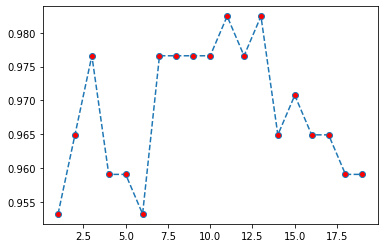

In [20]:
# Plot of K values and Scores
plt.plot(range(1,20), scores, marker='o', markerfacecolor='r', linestyle='--')

In [21]:
# Optimum k value is 7
final_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [22]:
#Prediction on  training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array(['B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M

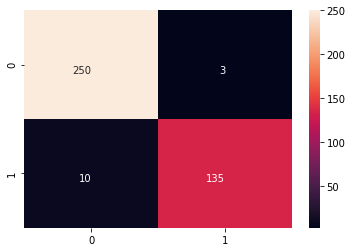

In [23]:
# Confusion Matrix of Training data
#Syntax: confusion_matrix(ActualValues, Predicted Values)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, final_train_pred), annot=True, 
            fmt='d', annot_kws={'va':'top','ha':'right'}) # d--> integer formatting

In [24]:
# Classification report for training Data
# Precision--> PPV--> Out of the positive predicted values, how many truely positive
print(classification_report(y_train, final_train_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97       253
           M       0.98      0.93      0.95       145

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.96       398
weighted avg       0.97      0.97      0.97       398



In [25]:
# Predictions on Test Data
final_test_pred = final_model.predict(scaled_X_test)  # y_test
final_test_pred

array(['B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B'], dtype=object)

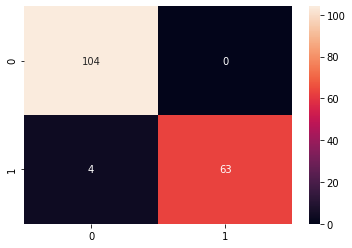

In [26]:
# Compare actual values of test data(y_test) and final_test_pred(model predicted values)
# Confusion_matrix(actualValues, predictedValues)
sns.heatmap(confusion_matrix(y_test, final_test_pred), annot=True, fmt='d')

In [27]:
# Classification Report for Test Data
print(classification_report(y_test, final_test_pred))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98       104
           M       1.00      0.94      0.97        67

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [28]:
# Predict the prob of a tumour being Benign or Malignant
# Predict--> give you the predicted value(B or M)
# Predict_proba--> gives you the probability associated with B and probability 
                                                         ##associated with M
# Syntax: objectname.predict_proba(Input values)

y_test_prob = final_model.predict_proba(scaled_X_test)
y_test_prob = pd.DataFrame(y_test_prob)
y_test_prob

,0,1
0,1.000000,0.000000
1,0.000000,1.000000
2,0.857143,0.142857
3,1.000000,0.000000
4,0.000000,1.000000
...,...,...
166,1.000000,0.000000
167,1.000000,0.000000
168,0.428571,0.571429
169,1.000000,0.000000


In [29]:
y_test

208    B
167    M
89     B
100    B
88     M
      ..
324    B
44     B
419    M
20     B
455    B
Name: diagnosis, Length: 171, dtype: object

In [30]:
# Roc curve
## TPR, FPR, Threshold
from sklearn.metrics import roc_auc_score, roc_curve
m_prob = final_model.predict_proba(scaled_X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, m_prob, pos_label='M' )

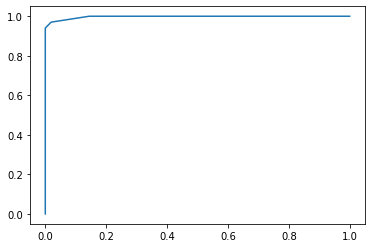

In [31]:
plt.plot(fpr, tpr)

In [32]:
roc_auc_score(y_test, m_prob)

0.9972732491389209

In [33]:
# KFold
#5 folds--> In each and every fold--> create a part of test data and remaining will be of training data
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
kfold.get_n_splits(X, y)

5

As given k values as 5, model will built for 5 times;so we are using a for loop

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).


Each fold is then used once as a test while the k - 1 remaining folds form the training set.One set of indices will be in test data and the remaning set of indices will be in training data

In [34]:
model_knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
score = []
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #pass the X_train, y_train into the knn algorithm
    model_knn.fit(X_train, y_train)
    
    # predict the model on test data(X_test, y_test)
    y_pred_test = model_knn.predict(X_test)
    
    # accuracy score of predicted values(y_pred_test) and A.V(y_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    score.append(accuracy)
print(score)
print('Average Score of the model:',np.mean(score))

[0.9122807017543859, 0.9035087719298246, 0.956140350877193, 0.9473684210526315, 0.9469026548672567]
Average Score of the model: 0.9332401800962584
